<a href="https://colab.research.google.com/github/Umanagalla27/CodeAlpha/blob/main/sales_forecasting_using_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-50b5a6fed34e>:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  date_range = pd.date_range(start='2019-01-01', end='2023-01-01', freq='Q')


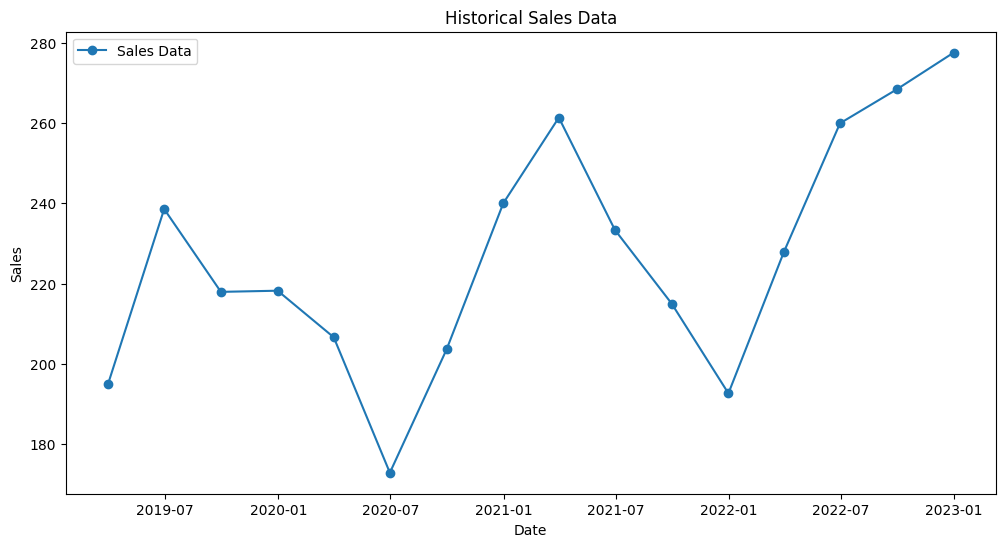

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate historical sales data (replace this with your actual dataset)
date_range = pd.date_range(start='2019-01-01', end='2023-01-01', freq='Q')
np.random.seed(42)
sales_data = np.random.poisson(lam=200, size=len(date_range)) + np.linspace(0, 50, len(date_range)) + np.sin(np.arange(len(date_range))) * 30

df = pd.DataFrame({'ds': date_range, 'y': sales_data})
df.set_index('ds', inplace=True)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'], label='Sales Data', marker='o')
plt.title('Historical Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

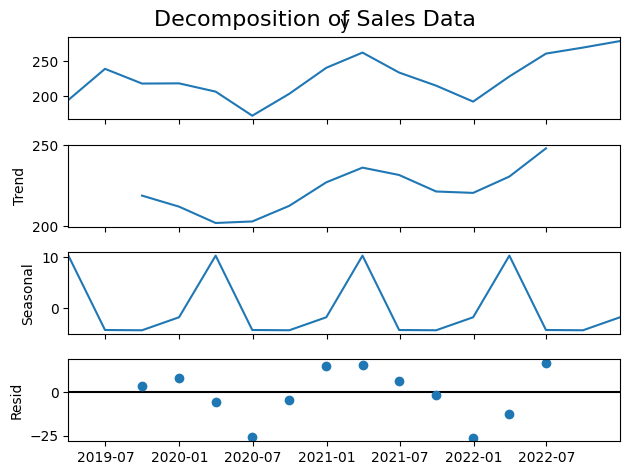

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(df['y'], model='additive')
fig = decomposition.plot()
plt.suptitle('Decomposition of Sales Data', fontsize=16)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0r980ef8/bwu27t3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0r980ef8/_5pg4aec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6075', 'data', 'file=/tmp/tmp0r980ef8/bwu27t3n.json', 'init=/tmp/tmp0r980ef8/_5pg4aec.json', 'output', 'file=/tmp/tmp0r980ef8/prophet_modelpfhj47rk/prophet_model-20250509112413.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:24:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:24:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

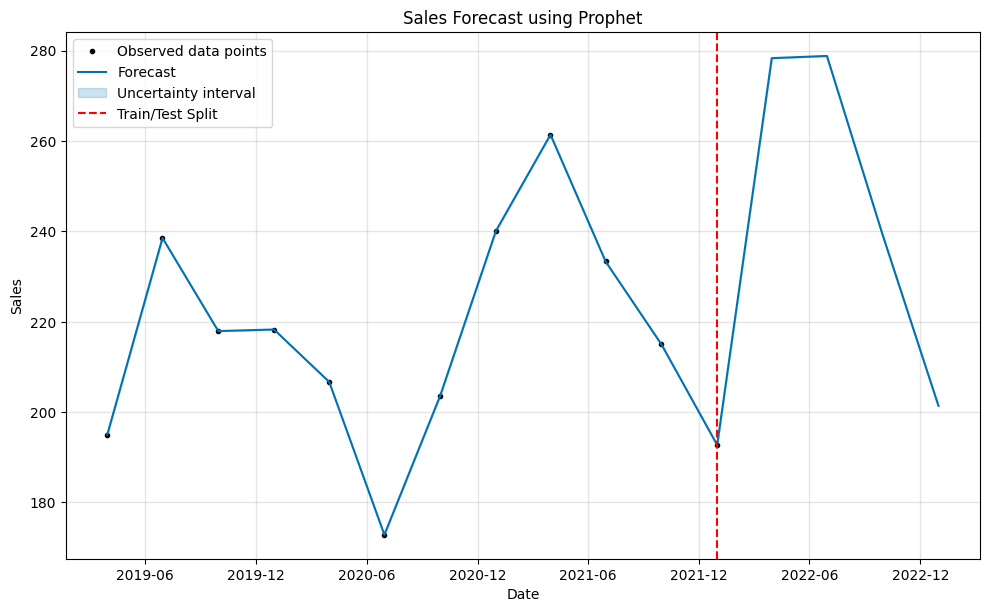

In [4]:
from prophet import Prophet
import pandas as pd

# Assuming 'df' is your DataFrame from previous cells

# Split data into train and test sets
# Adjust the split ratio (e.g., 0.8) as needed
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Initialize and fit the Prophet model
prophet_model = Prophet(seasonality_mode='multiplicative')
prophet_model.fit(train_df.reset_index()) # Now train_df is defined

# Make future data frame for predictions
future_dates = prophet_model.make_future_dataframe(periods=len(test_df), freq='Q')
forecast = prophet_model.predict(future_dates)

# Plotting Prophet results
fig = prophet_model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.axvline(x=train_df.index[-1], color='r', linestyle='--', label='Train/Test Split')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


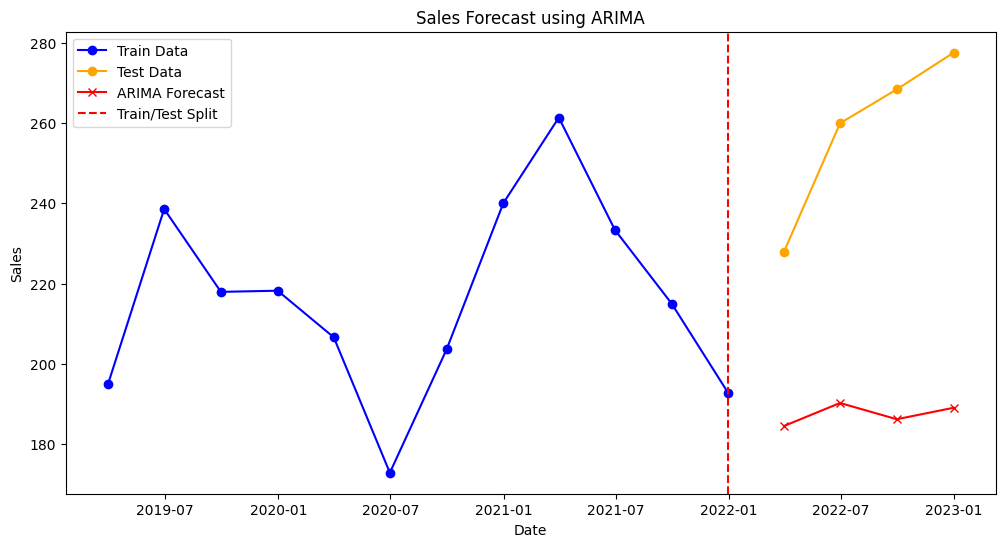

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (consider tuning p, d, q parameters based on the dataset)
arima_model = ARIMA(train_df['y'], order=(1, 1, 1))  # (p, d, q) values can be improved based on ACF/PACF analysis
arima_result = arima_model.fit()

# Make predictions
arima_forecast = arima_result.forecast(steps=len(test_df))

# Plotting ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['y'], label='Train Data', color='blue', marker='o')
plt.plot(test_df.index, test_df['y'], label='Test Data', color='orange', marker='o')
plt.plot(test_df.index, arima_forecast, label='ARIMA Forecast', color='red', marker='x')
plt.axvline(x=train_df.index[-1], color='r', linestyle='--', label='Train/Test Split')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

# Evaluate Prophet
prophet_predictions = forecast['yhat'].tail(len(test_df)).values
prophet_rmse = np.sqrt(mean_squared_error(test_df['y'], prophet_predictions))
print(f'Prophet RMSE: {prophet_rmse}')

# Evaluate ARIMA
arima_rmse = np.sqrt(mean_squared_error(test_df['y'], arima_forecast))
print(f'ARIMA RMSE: {arima_rmse}')

Prophet RMSE: 48.85164217076044
ARIMA RMSE: 72.98389259069205


In [7]:
# Save the models if needed
import pickle

with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(prophet_model, f)

with open('arima_model.pkl', 'wb') as f:
    pickle.dump(arima_result, f)